In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from BacktestReturns import Backtest

# Implied Signal Returns

In [2]:
def prep_implied_signal() -> pd.DataFrame: 

    df_imp = (Backtest().implied_signal_rtn().drop(
        columns = ["lower_decile", "upper_decile"]).
        assign(
            pca_group = lambda x: x.variable.str.split(" ").str[0],
            pca_level = lambda x: x.variable.str.split(" ").str[1]).
        drop(columns = ["variable"]))
    
    return df_imp

df_imp = prep_implied_signal()

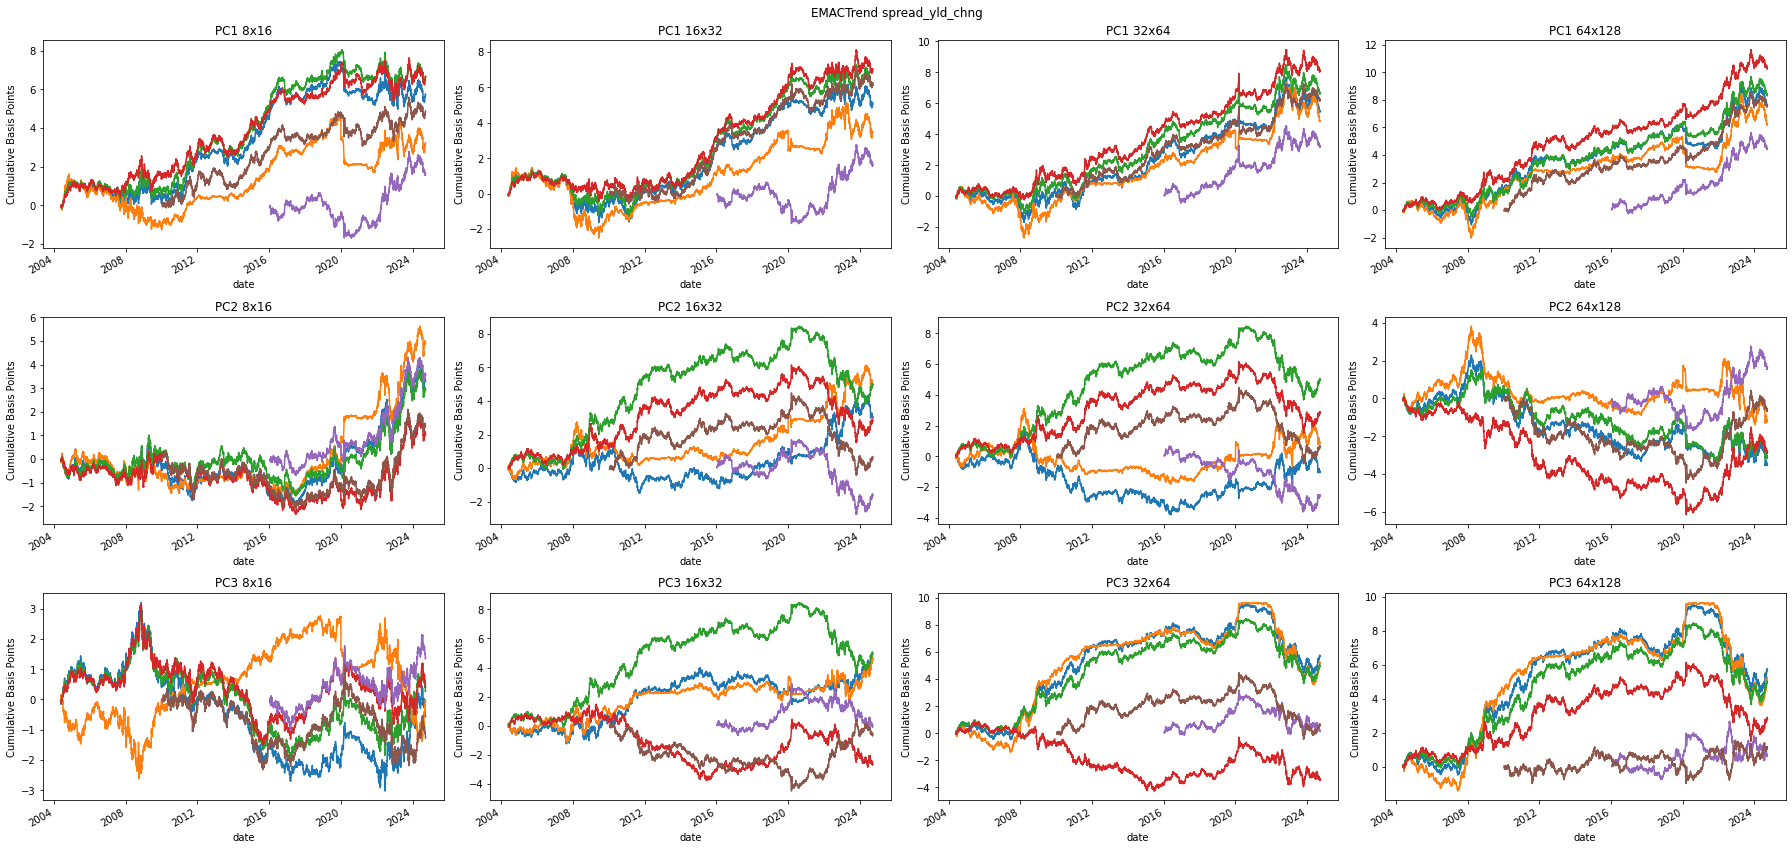

In [3]:
def plot_cum_strats(df_imp: pd.DataFrame, signal_type: str = "EMACTrend", pca_group:   str = "spread_yld_chng") -> plt.Figure: 

    df_plot = (df_imp.query(
        "signal_type == @signal_type & pca_group == @pca_group")
        [["date", "strat_name", "security", "pca_level", "signal_rtn"]].
        assign(group_var = lambda x: x.pca_level + "_" + x.strat_name))

    strats     = df_plot.strat_name.drop_duplicates().to_list()
    pcs        = df_plot.pca_level.drop_duplicates()
    group_vars = df_plot.group_var.drop_duplicates().to_list()

    fig, axes = plt.subplots(ncols = len(strats), nrows = len(pcs), figsize = (25, 12))

    for group_var, ax in zip(group_vars, axes.flatten()): 

        (df_plot.query(
            "group_var == @group_var")
            [["date", "security", "signal_rtn"]].
            rename(columns = {"security": ""}).
            pivot(index = "date", columns = "", values = "signal_rtn").
            cumsum().
            plot(
                ax     = ax,
                legend = False,
                title  = group_var.replace("_", " "),
                ylabel = "Cumulative Basis Points"))

    fig.suptitle("{} {}".format(signal_type, "spread_yld_chng"))
    plt.tight_layout()
    
plot_cum_strats(df_imp)